**Fashion mnist**

Fashion mnistとは
・服、鞄、靴などのイメージを分類すること

学習順番

１。データロード

２。データ可視化

３。データ前処理

４。モデル定義

５。データ拡張

６。学習処理

７。入力画像と推論結果を表示

In [0]:
import keras

In [0]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import models
from keras.models import Model
from keras import Input
from keras.layers import Activation, Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import TensorBoard, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
# fashion_mnist データロード
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [0]:
# データをトレーニング用、評価用に分割
# 学習データ8割、検証データを2割に分割
_x_train, _x_test, _y_train, _y_test = train_test_split(x_train, y_train, test_size=0.2)

In [5]:
print("x_train   : ", _x_train.shape) # x_train   :  (48000, 28, 28)
print("y_train   : ", _y_train.shape) # y_train   :  (48000,)
print("x_test    : ", _x_test.shape) # x_test    :  (10000, 28, 28)
print("y_test    : ", _y_test.shape) # y_test    :  (10000,)

x_train   :  (48000, 28, 28)
y_train   :  (48000,)
x_test    :  (12000, 28, 28)
y_test    :  (12000,)


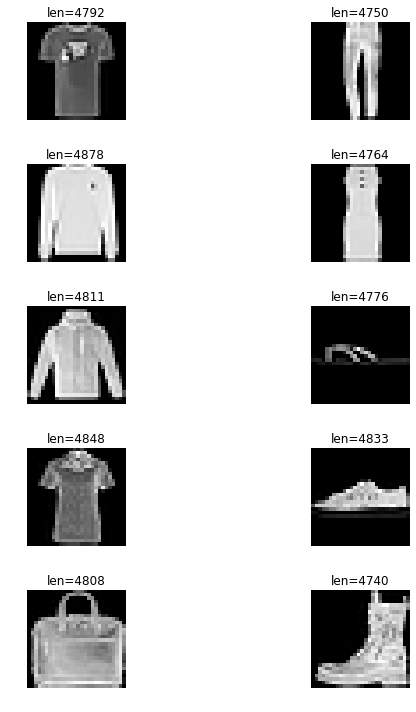

In [6]:
plt.figure(figsize=(10,10))

# MNISTの0から9の画像をそれぞれ表示する。
for i in range(10):
    data = [(x,t) for x, t in zip(_x_train, _y_train) if t == i]
    x, y = data[0]

    plt.subplot(5,2, i+1)
    # plt.title()はタイトルを表示する。ここでは画像枚数を表示している。
    plt.title("len={}".format(len(data)))
    # 画像を見やすいように座標軸を非表示にする。
    plt.axis("off")
    plt.imshow(x, cmap='gray')

plt.tight_layout()
plt.show()

In [0]:
# 学習、検証、テストデータの前処理用関数。
def preprocess(data, label=False):
    if label:
        # データはto_categorical()でone-hot-encodingする。
        # one-hot-encodingとは
        # PCの立場だと各々のアイテムに例のように固有番号つける。
        #　例）apple = 1, banana = 2
        # But,単純に固有番号を与えると問題が発生する,
        # なので、MerchineLearningでは例のようにVectorDataで表す。
        #　例）apple = [1,0], banana = [0,1]
        # 要は、各々のアイテムにindexを付与、
        # ということは、表現したいアイテムにi「１」を与え、他のアイテムには「０」を与える
        data = to_categorical(data)
    else:
        # 入力画像は、astype('float32')で型変換を行い、レンジを0-1にするために255で割る。
        # 0-255 -> 0-1
        data = data.astype('float32') / 255
        # Kerasの入力データの形式は(ミニバッチサイズ、横幅、縦幅、チャネル数)である必要があるので、reshape()を使って形式を変換する。
        # (sample, width, height) -> (sample, width, height, channel)
        data = data.reshape((-1, 28, 28, 1))

    return data

In [9]:
x_train = preprocess(_x_train)
x_test = preprocess(_x_test)

y_train = preprocess(_y_train, label=True)
y_test = preprocess(_y_test, label=True)

print(x_train.shape) # (48000, 28, 28, 1)
print(x_test.shape) # (10000, 28, 28, 1)
print(x_train.max()) # 1.0
print(y_test.max()) # 1.0
print(y_train.shape) # (48000, 10)
print(y_test.shape) # (10000, 10)

(48000, 28, 28, 1)
(12000, 28, 28, 1)
1.0
1.0
(48000, 10)
(12000, 10)


In [0]:
#sequential model 定義
def model_sequential():
    activation = 'relu'

    model = models.Sequential()

    model.add(Conv2D(32, (3, 3), padding='same', name='conv1', input_shape=(28, 28 , 1)))
    model.add(Activation(activation, name='act1'))
    model.add(MaxPooling2D((2, 2), name='pool1'))

    model.add(Conv2D(64, (3, 3), padding='same', name='conv2'))
    model.add(Activation(activation, name='act2'))
    model.add(MaxPooling2D((2, 2), name='pool2'))

    model.add(Conv2D(128, (3, 3), padding='same', name='conv3'))
    model.add(Activation(activation, name='act3'))

    model.add(Flatten(name='flatten'))
    model.add(Dense(64, name='dense4'))
    model.add(Activation(activation, name='act4'))
    model.add(Dense(10, name='dense5'))
    model.add(Activation('softmax', name='last_act'))

    return model

In [11]:
model = model_sequential()

#modelの構成をプリントする
model.summary()

#どのように学習を行うのかを決める
#optimizer(最適化を行う)、loss(誤差計算を行う)、
#metrics(modelの性能を測る指標を指定する) accuracy(推論した数に対して、何回正解したかを計算する)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

W0829 10:47:22.514368 139758330214272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0829 10:47:22.563245 139758330214272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0829 10:47:22.573148 139758330214272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0829 10:47:22.619809 139758330214272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0829 10:47:22.691643 139758330214272 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 28, 28, 32)        320       
_________________________________________________________________
act1 (Activation)            (None, 28, 28, 32)        0         
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 14, 14, 64)        18496     
_________________________________________________________________
act2 (Activation)            (None, 14, 14, 64)        0         
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 7, 7, 64)          0         
_________________________________________________________________
conv3 (Conv2D)               (None, 7, 7, 128)         73856     
__________

In [0]:
#データ拡張
#modelの性能を上げるためにデータ量を増やす。
#なぜなら、学習データが少ないと過学習がおきてしまい汎化性能が出ないと言われるので
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False)

In [14]:
batch_size=128
epochs=5
verbose=1
steps_per_epoch = x_train.shape[0] // batch_size

#学習処理
history = model.fit_generator(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    verbose=verbose)

W0829 11:02:28.393806 139758330214272 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0829 11:02:28.495524 139758330214272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/5
375/375 [==============================] - 82s 220ms/step - loss: 0.7724 - acc: 0.7109
Epoch 2/5
375/375 [==============================] - 81s 216ms/step - loss: 0.5108 - acc: 0.8058
Epoch 3/5
375/375 [==============================] - 81s 216ms/step - loss: 0.4397 - acc: 0.8337
Epoch 4/5
375/375 [==============================] - 81s 216ms/step - loss: 0.3980 - acc: 0.8501
Epoch 5/5
375/375 [==============================] - 81s 215ms/step - loss: 0.3734 - acc: 0.8604


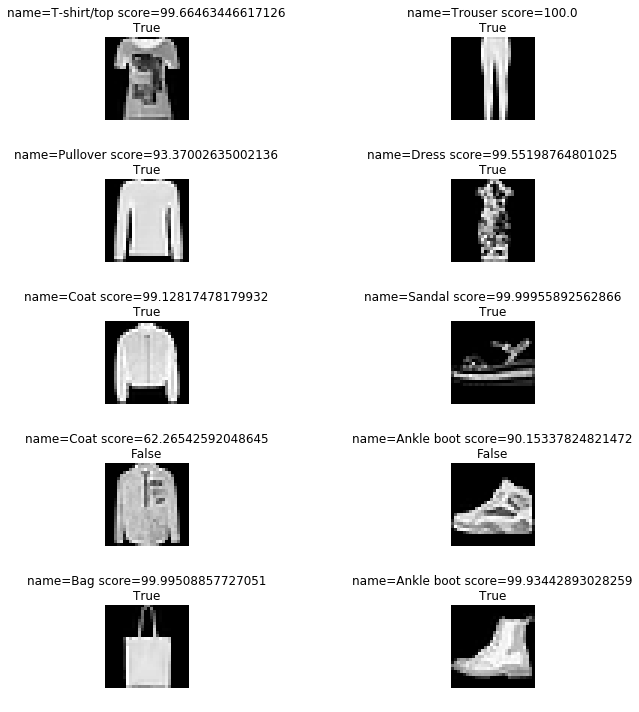

In [18]:
#入力画像と推論結果を表示

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))

for i in range(10):
    data = [(x,t) for x, t in zip(_x_test, _y_test) if t == i]
    x, y = data[0]

    pred = model.predict(preprocess(x, label=False))

    ans = np.argmax(pred)
    score = np.max(pred) * 100

    plt.subplot(5,2, i+1)
    plt.axis("off")
    plt.title("name={} score={}\n{}".format(class_names[ans], score,ans==y))

    plt.imshow(x, cmap='gray')


plt.tight_layout()
plt.show()